In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cdasws import CdasWs
import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

cdas = CdasWs()

nT_to_T = 1e-9
per_cmCubic_to_per_mCubic = 1e6
mu_0 = 4*np.pi*1e-7
m_proton = 1.6726219*1e-27

all databases:
- 3DP_PLSM: proton and alpha-particle
- 3DP_ELM: electron
- MFI: magnetic field
- AC_H2_SWI / AC_H3_SW2: components

In [2]:
selected_events = pd.read_pickle('selected_events.pkl')

In [3]:
initialize = True
if initialize:
#     selected_events['proton_density_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['proton_speed_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['proton_temperature_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['alpha_density_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['electron_density_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['electron_speed_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['electron_temperature_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['B_total_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['x_GSE_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['y_GSE_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['z_GSE_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['x_GSE_ACE'] = [np.nan,]*len(selected_events)
#     selected_events['y_GSE_ACE'] = [np.nan,]*len(selected_events)
#     selected_events['z_GSE_ACE'] = [np.nan,]*len(selected_events)
    pass
selected_events[:3]

,start,end,duration,num_of_log,fill_rate,proton_density_3DP,proton_speed_3DP,proton_temperature_3DP,alpha_density_3DP,electron_density_3DP,electron_speed_3DP,electron_temperature_3DP,B_total_3DP,x_GSE_WIND,y_GSE_WIND,z_GSE_WIND,x_GSE_ACE,y_GSE_ACE,z_GSE_ACE
0,1999-05-11 18:25:00,1999-05-11 18:57:00,33,26,0.787879,0.271215,224.82663,6.51306,0.010688,2.350267,113.097198,9.971718,2.350267,40.504093,-32.838547,7.376534,NaN,NaN,NaN
1,2000-03-29 04:45:00,2000-03-29 05:12:00,28,25,0.892857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-20 04:17:00,2002-03-20 04:56:00,40,30,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
i_event = 0
t_start, t_end = selected_events.iloc[i_event][:2]
t_start_localize = t_start.tz_localize(tz='UTC')
t_end_localize = t_end.tz_localize(tz='UTC')

# WIND 3DP-PLSP

In [5]:
%%time
variables_3DP = ['FLUX','FLUX_STACKED','ENERGY','MOM.P.SC_CURRENT','MOM.P.MAGF','MOM.P.DENSITY','MOM.P.AVGTEMP','MOM.P.VTHERMAL','MOM.P.VELOCITY','MOM.P.FLUX','MOM.P.PTENS','MOM.P.MFTENS','MOM.P.T3','MOM.P.SYMM','MOM.P.SYMM_THETA','MOM.P.SYMM_PHI','MOM.P.SYMM_ANG','MOM.P.MAGT3','MOM.P.ERANGE','MOM.P.MASS','MOM.P.VALID','MOM.P.VEL_MAG','MOM.P.VEL_TH','MOM.P.VEL_PHI','MOM.A.SC_CURRENT','MOM.A.MAGF','MOM.A.DENSITY','MOM.A.AVGTEMP','MOM.A.VTHERMAL','MOM.A.VELOCITY','MOM.A.FLUX','MOM.A.PTENS','MOM.A.MFTENS','MOM.A.T3','MOM.A.SYMM','MOM.A.SYMM_THETA','MOM.A.SYMM_PHI','MOM.A.SYMM_ANG','MOM.A.MAGT3','MOM.A.ERANGE','MOM.A.MASS','MOM.A.VALID','MOM.A.VEL_MAG','MOM.A.VEL_TH','MOM.A.VEL_PHI','TIME']
status_3DP, data_3DP = cdas.get_data('WI_PLSP_3DP', variables_3DP, t_start_localize, t_end_localize)

print(data_3DP.keys())
# there is magnetic field interpolated to the epoch of protons

dict_keys(['Epoch', 'FLUX', 'FLUX_STACKED', 'ENERGY', 'MOM$P$SC_CURRENT', 'MOM$P$MAGF', 'MOM$P$DENSITY', 'MOM$P$AVGTEMP', 'MOM$P$VTHERMAL', 'MOM$P$VELOCITY', 'MOM$P$FLUX', 'MOM$P$PTENS', 'MOM$P$MFTENS', 'MOM$P$T3', 'MOM$P$SYMM', 'MOM$P$SYMM_THETA', 'MOM$P$SYMM_PHI', 'MOM$P$SYMM_ANG', 'MOM$P$MAGT3', 'MOM$P$ERANGE', 'MOM$P$MASS', 'MOM$P$VALID', 'MOM$P$VEL_MAG', 'MOM$P$VEL_TH', 'MOM$P$VEL_PHI', 'MOM$A$SC_CURRENT', 'MOM$A$MAGF', 'MOM$A$DENSITY', 'MOM$A$AVGTEMP', 'MOM$A$VTHERMAL', 'MOM$A$VELOCITY', 'MOM$A$FLUX', 'MOM$A$PTENS', 'MOM$A$MFTENS', 'MOM$A$T3', 'MOM$A$SYMM', 'MOM$A$SYMM_THETA', 'MOM$A$SYMM_PHI', 'MOM$A$SYMM_ANG', 'MOM$A$MAGT3', 'MOM$A$ERANGE', 'MOM$A$MASS', 'MOM$A$VALID', 'MOM$A$VEL_MAG', 'MOM$A$VEL_TH', 'MOM$A$VEL_PHI', 'TIME', 'ENERGY_good', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9', 'metavar10', 'metavar11', 'metavar12', 'metavar13', 'metavar14', 'metavar15', 'metavar16'])
CPU times: user 236 ms, sys: 

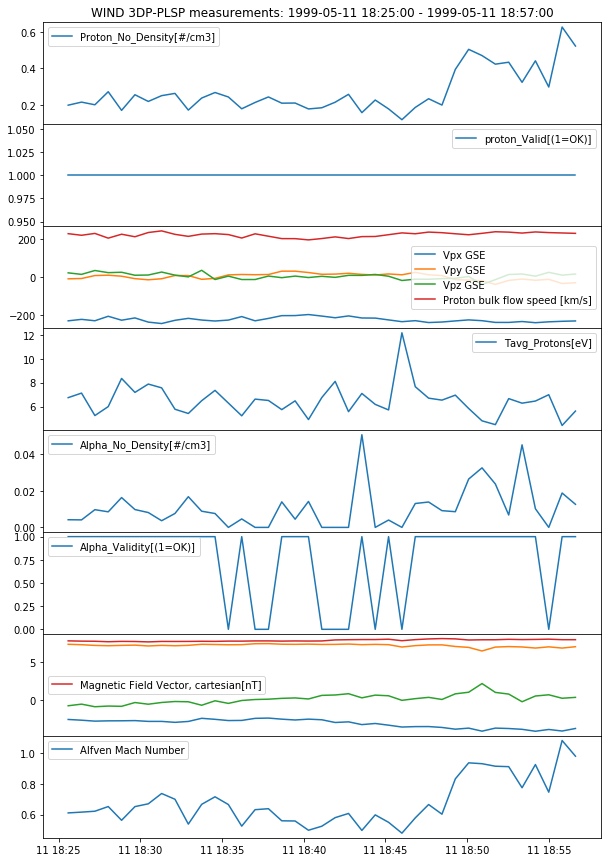

In [6]:
fig,axes = plt.subplots(8,figsize=(10,15))
plt.subplots_adjust(hspace=0)
ax = axes[0]
ax.set_title(f'WIND 3DP-PLSP measurements: {t_start} - {t_end}')
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$DENSITY'],label=f"{data_3DP['MOM$P$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$P$DENSITY'].attrs['UNITS']}]")
ax = axes[1]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VALID'],label=f"{data_3DP['MOM$P$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$P$VALID'].attrs['UNITS']}]")
ax = axes[2]
p_speed_3DP = np.linalg.norm(data_3DP['MOM$P$VELOCITY'],axis=1)
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'][:,0],label='Vpx GSE')
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'][:,1],label='Vpy GSE')
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'][:,2],label='Vpz GSE')
ax.plot(data_3DP['Epoch'],p_speed_3DP,label=f"Proton bulk flow speed [{data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}]")
ax = axes[3]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$AVGTEMP'],label=f"{data_3DP['MOM$P$AVGTEMP'].attrs['LABLAXIS']}[{data_3DP['MOM$P$AVGTEMP'].attrs['UNITS']}]")
ax = axes[4]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$DENSITY'],label=f"{data_3DP['MOM$A$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$A$DENSITY'].attrs['UNITS']}]")
ax = axes[5]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$VALID'],label=f"{data_3DP['MOM$A$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$A$VALID'].attrs['UNITS']}]")
ax = axes[6]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$MAGF'])
mag_field_tr_interped_to_3DP = np.linalg.norm(data_3DP['MOM$P$MAGF'],axis=1)
ax.plot(data_3DP['Epoch'],mag_field_tr_interped_to_3DP,label=f"{data_3DP['MOM$P$MAGF'].attrs['FIELDNAM']}[{data_3DP['MOM$P$MAGF'].attrs['UNITS']}]")
ax = axes[7]

alfven_speed = (mag_field_tr_interped_to_3DP*nT_to_T)/np.sqrt(mu_0*m_proton*data_3DP['MOM$P$DENSITY']*per_cmCubic_to_per_mCubic)
alfven_speed = alfven_speed / 1000
alfven_mach = p_speed_3DP / alfven_speed
ax.plot(data_3DP['Epoch'],alfven_mach,label='Alfven Mach Number')

for ax in axes:
    ax.legend(loc='best')
    if ax!= axes[-1]:
        ax.set_xticks([])

_ = 0;

In [7]:
p_density_3DP_avg = np.mean(data_3DP['MOM$P$DENSITY'])
p_density_3DP_std = np.std(data_3DP['MOM$P$DENSITY'])
p_speed_3DP_avg = np.mean(p_speed_3DP)
p_speed_3DP_std = np.std(p_speed_3DP)
p_temperature_3DP_avg = np.mean(data_3DP['MOM$P$AVGTEMP'])
# average over the whole segment
alpha_density_3DP_avg = np.mean(data_3DP['MOM$A$DENSITY']*data_3DP['MOM$A$VALID']) # use $valid$

print(f"p_density_3DP_avg: {p_density_3DP_avg:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
print(f"p_density_3DP_std: {p_density_3DP_std:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
print(f"p_speed_3DP_avg: {p_speed_3DP_avg:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"p_speed_3DP_std: {p_speed_3DP_std:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"p_temperature_3DP_avg: {p_temperature_3DP_avg:.4} {data_3DP['MOM$P$AVGTEMP'].attrs['UNITS']}")
print(f"alpha_density_3DP_avg: {alpha_density_3DP_avg:.4} {data_3DP['MOM$A$DENSITY'].attrs['UNITS']}")

selected_events.loc[i_event,'proton_density_3DP'] = p_density_3DP_avg
selected_events.loc[i_event,'proton_speed_3DP'] = p_speed_3DP_avg
selected_events.loc[i_event,'proton_temperature_3DP'] = p_temperature_3DP_avg
selected_events.loc[i_event,'alpha_density_3DP'] = alpha_density_3DP_avg

p_density_3DP_avg: 0.2712 #/cm3
p_density_3DP_std: 0.1163 #/cm3
p_speed_3DP_avg: 224.8 km/s
p_speed_3DP_std: 12.2 km/s
p_temperature_3DP_avg: 6.513 eV
alpha_density_3DP_avg: 0.01069 #/cm3


In [8]:
# selected_events.to_pickle('selected_events.pkl')
# use it if necessary.

# WIND 3DP-ELM

In [9]:
%%time
variables_3DP_ELM = ['SC_POT','SC_CURRENT','MAGF','DENSITY','AVGTEMP','VTHERMAL','VELOCITY','FLUX','PTENS','MFTENS','T3','SYMM','SYMM_THETA','SYMM_PHI','SYMM_ANG','MAGT3','ERANGE','MASS','VALID','VEL_MAG','VEL_TH','VEL_PHI','TIME']
status_3DP_ELM, data_3DP_ELM = cdas.get_data('WI_ELM2_3DP', variables_3DP_ELM, t_start_localize, t_end_localize)

print(data_3DP_ELM.keys())

dict_keys(['Epoch', 'SC_POT', 'SC_CURRENT', 'MAGF', 'DENSITY', 'AVGTEMP', 'VTHERMAL', 'VELOCITY', 'FLUX', 'PTENS', 'MFTENS', 'T3', 'SYMM', 'SYMM_THETA', 'SYMM_PHI', 'SYMM_ANG', 'MAGT3', 'ERANGE', 'MASS', 'VALID', 'VEL_MAG', 'VEL_TH', 'VEL_PHI', 'TIME', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8'])
CPU times: user 99.2 ms, sys: 7.25 ms, total: 106 ms
Wall time: 2.55 s


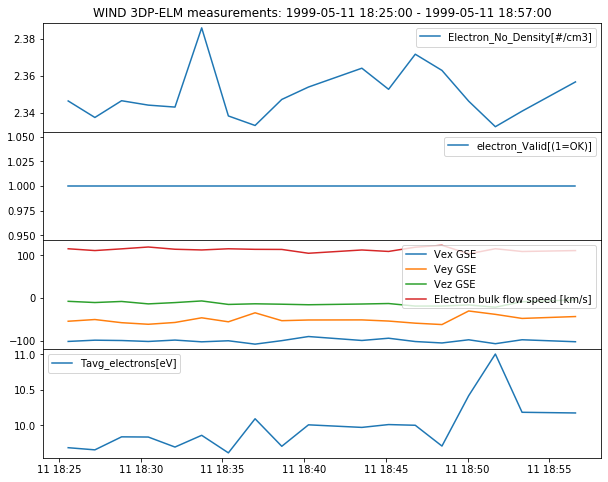

In [10]:
fig, axes = plt.subplots(4, figsize=(10, 8))
plt.subplots_adjust(hspace=0)
ax = axes[0]
ax.set_title(f'WIND 3DP-ELM measurements: {t_start} - {t_end}')
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['DENSITY'],
    label=f"{data_3DP_ELM['DENSITY'].attrs['LABLAXIS']}[{data_3DP_ELM['DENSITY'].attrs['UNITS']}]"
)
ax = axes[1]
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['VALID'],
    label=f"{data_3DP_ELM['VALID'].attrs['LABLAXIS']}[{data_3DP_ELM['VALID'].attrs['UNITS']}]"
)
ax = axes[2]
e_speed_3DP = np.linalg.norm(data_3DP_ELM['VELOCITY'],axis=1)
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'][:,0],label='Vex GSE')
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'][:,1],label='Vey GSE')
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'][:,2],label='Vez GSE')
ax.plot(data_3DP_ELM['Epoch'],e_speed_3DP,label=f"Electron bulk flow speed [{data_3DP_ELM['VELOCITY'].attrs['UNITS']}]")
ax = axes[3]
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['AVGTEMP'],
    label=f"{data_3DP_ELM['AVGTEMP'].attrs['LABLAXIS']}[{data_3DP_ELM['AVGTEMP'].attrs['UNITS']}]"
)

for ax in axes:
    ax.legend(loc='best')
    if ax != axes[-1]:
        ax.set_xticks([])

_ = 0;

In [11]:
e_density_3DP_avg = np.mean(data_3DP_ELM['DENSITY'])
e_density_3DP_std = np.std(data_3DP_ELM['DENSITY'])
e_speed_3DP_avg = np.mean(e_speed_3DP)
e_speed_3DP_std = np.std(e_speed_3DP)
e_temperature_3DP_avg = np.mean(data_3DP_ELM['AVGTEMP'])

print(f"e_density_3DP_avg: {e_density_3DP_avg:.4} {data_3DP_ELM['DENSITY'].attrs['UNITS']}")
print(f"e_density_3DP_std: {e_density_3DP_std:.4} {data_3DP_ELM['DENSITY'].attrs['UNITS']}")
print(f"e_speed_3DP_avg: {e_speed_3DP_avg:.4} {data_3DP_ELM['VELOCITY'].attrs['UNITS']}")
print(f"e_speed_3DP_std: {e_speed_3DP_std:.4} {data_3DP_ELM['VELOCITY'].attrs['UNITS']}")
print(f"e_temperature_3DP_avg: {e_temperature_3DP_avg:.4} {data_3DP_ELM['AVGTEMP'].attrs['UNITS']}")

selected_events.loc[i_event,'electron_density_3DP'] = e_density_3DP_avg
selected_events.loc[i_event,'electron_speed_3DP'] = e_speed_3DP_avg
selected_events.loc[i_event,'electron_temperature_3DP'] = e_temperature_3DP_avg

e_density_3DP_avg: 2.35 #/cm3
e_density_3DP_std: 0.01349 #/cm3
e_speed_3DP_avg: 113.1 km/s
e_speed_3DP_std: 4.745 km/s
e_temperature_3DP_avg: 9.972 eV


In [12]:
# selected_events.to_pickle('selected_events.pkl')
# use it if necessary.

# WIND MFI

In [13]:
%%time
variables_MFI = ['BF1','BF1LOG','BRMSF1','BGSM','BRMSGSM','BGSE','BGSEa','BRMSGSE','DIST','PGSM','PGSE','B3F1','B3F1LOG','B3RMSF1','B3GSM','B3RMSGSM','B3GSE','B3GSEa','B3RMSGSE','B1F1','B1F1LOG','B1RMSF1','B1GSM','B1RMSGSM','B1GSE','B1GSEa','B1RMSGSE','DIST1','P1GSM','P1GSE','DISTV','PGSMV','PGSEV','DIST1V','P1GSMV','P1GSEV']
status_MFI, data_MFI = cdas.get_data('WI_H0_MFI', variables_MFI, t_start_localize, t_end_localize)
print(data_MFI.keys())

dict_keys(['Epoch', 'Epoch3', 'Epoch1', 'BF1', 'BF1LOG', 'BRMSF1', 'BGSM', 'BRMSGSM', 'BGSE', 'BGSEa', 'BRMSGSE', 'DIST', 'PGSM', 'PGSE', 'B3F1', 'B3F1LOG', 'B3RMSF1', 'B3GSM', 'B3RMSGSM', 'B3GSE', 'B3GSEa', 'B3RMSGSE', 'B1F1', 'B1F1LOG', 'B1RMSF1', 'B1GSM', 'B1RMSGSM', 'B1GSE', 'B1GSEa', 'B1RMSGSE', 'DIST1', 'P1GSM', 'P1GSE', 'DISTV', 'PGSMV', 'PGSEV', 'DIST1V', 'P1GSMV', 'P1GSEV', 'cartesian', 'angle', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9'])
CPU times: user 158 ms, sys: 6.98 ms, total: 165 ms
Wall time: 4 s


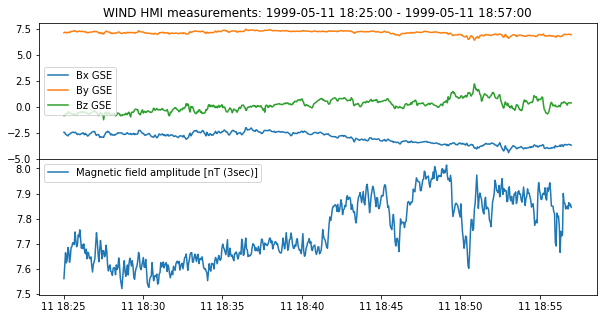

In [14]:
fig, axes = plt.subplots(2, figsize=(10, 5))
plt.subplots_adjust(hspace=0)

ax = axes[0]
ax.set_title(f'WIND HMI measurements: {t_start} - {t_end}')
ax.plot(data_MFI['Epoch3'],data_MFI['B3GSE'][:,0],label='Bx GSE')
ax.plot(data_MFI['Epoch3'],data_MFI['B3GSE'][:,1],label='By GSE')
ax.plot(data_MFI['Epoch3'],data_MFI['B3GSE'][:,2],label='Bz GSE')
ax = axes[1]
magnetic_field_amp_MFI = np.linalg.norm(data_MFI['B3GSE'],axis=1)
ax.plot(data_MFI['Epoch3'],magnetic_field_amp_MFI,
        label=f"Magnetic field amplitude [{data_MFI['B3GSE'].attrs['UNITS']}]"
) # 3 denotes 3 sec cadence (without 3 denotes 1 min)

for ax in axes:
    ax.legend(loc='best')
    if ax != axes[-1]:
        ax.set_xticks([])

_ = 0;

In [15]:
x_GSE_HMI,y_GSE_HMI,z_GSE_HMI = np.mean(data_MFI['PGSEV'],axis=0)
selected_events.loc[i_event,'x_GSE_WIND']=x_GSE_HMI
selected_events.loc[i_event,'y_GSE_WIND']=y_GSE_HMI
selected_events.loc[i_event,'z_GSE_WIND']=z_GSE_HMI

B_total_HMI_avg = np.mean(magnetic_field_amp_MFI)
print(f"B_total_HMI_avg: {B_total_HMI_avg:.4} {data_MFI['B3GSE'].attrs['UNITS']}")
selected_events.loc[i_event,'B_total_3DP'] = e_density_3DP_avg

# Here we do not simply log the value of B. We also mind the trend of the B vector.

B_total_HMI_avg: 7.753 nT (3sec)


In [16]:
# selected_events.to_pickle('selected_events.pkl')
# use it if necessary.

# ACE-SWE

In [34]:
%%time
variables_SWE = ['Np','Vp','Tpr','alpha_ratio','V_GSE','V_RTN','V_GSM','SC_pos_GSE','SC_pos_GSM']
status_SWE, data_SWE = cdas.get_data('AC_H0_SWE', variables_SWE, t_start_localize, t_end_localize)
print(data_MFI.keys())
# 1 min cadence

dict_keys(['Epoch', 'Epoch3', 'Epoch1', 'BF1', 'BF1LOG', 'BRMSF1', 'BGSM', 'BRMSGSM', 'BGSE', 'BGSEa', 'BRMSGSE', 'DIST', 'PGSM', 'PGSE', 'B3F1', 'B3F1LOG', 'B3RMSF1', 'B3GSM', 'B3RMSGSM', 'B3GSE', 'B3GSEa', 'B3RMSGSE', 'B1F1', 'B1F1LOG', 'B1RMSF1', 'B1GSM', 'B1RMSGSM', 'B1GSE', 'B1GSEa', 'B1RMSGSE', 'DIST1', 'P1GSM', 'P1GSE', 'DISTV', 'PGSMV', 'PGSEV', 'DIST1V', 'P1GSMV', 'P1GSEV', 'cartesian', 'angle', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9'])
CPU times: user 67.4 ms, sys: 28 ms, total: 95.4 ms
Wall time: 3.53 s


In [37]:
len(data_SWE['Np'])
selected_events[:2]

30

,start,end,duration,num_of_log,fill_rate,proton_density_3DP,proton_speed_3DP,proton_temperature_3DP,alpha_density_3DP,electron_density_3DP,electron_speed_3DP,electron_temperature_3DP,B_total_3DP,x_GSE_WIND,y_GSE_WIND,z_GSE_WIND,x_GSE_ACE,y_GSE_ACE,z_GSE_ACE
0,1999-05-11 18:25:00,1999-05-11 18:57:00,33,26,0.787879,0.271215,224.82663,6.51306,0.010688,2.350267,113.097198,9.971718,2.350267,40.504093,-32.838547,7.376534,NaN,NaN,NaN
1,2000-03-29 04:45:00,2000-03-29 05:12:00,28,25,0.892857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data_SWE['Np']

VarCopy([ 1.704e-01,  1.972e-01,  1.288e-01,  1.464e-01,  9.720e-02,
          1.207e-01,  1.511e-01,  2.193e-01,  5.177e-01,  5.365e-01,
          6.721e-01,  3.167e-01,  2.353e-01, -1.000e+31, -1.000e+31,
         -1.000e+31, -1.000e+31, -1.000e+31, -1.000e+31, -1.000e+31,
         -1.000e+31, -1.000e+31, -1.000e+31, -1.000e+31, -1.000e+31,
         -1.000e+31, -1.000e+31, -1.000e+31, -1.000e+31, -1.000e+31],
        dtype=float32)

# ACE-SWI

In [17]:
t_AC_H2_SWI_end = datetime.datetime(2011,8,21,22,40,54)
t_AC_H3_SW2_start = datetime.datetime(2012,6,1,0,40,44)
if (t_end - t_AC_H2_SWI_end).value < 0:
    name_database = 'AC_H2_SWI' # 1hr cadence
elif (t_start - t_AC_H3_SW2_start).value > 0:
    name_database = 'AC_H3_SW2' # 2hr cadence
else:
    raise ValueError
print(f"Event: {t_start} - {t_end}, using {name_database}")

Event: 1999-05-11 18:25:00 - 1999-05-11 18:57:00, using AC_H2_SWI


In [26]:
datetime.timedelta(minutes=30)

datetime.timedelta(0, 1800)

In [27]:
# extend time interval
t_middle = t_start + (t_start - t_end) / 2
print(t_middle)
t_start_extended = t_middle - datetime.timedelta(minutes=30)
t_end_extended = t_middle + datetime.timedelta(minutes=30)
t_start_extended_localize = t_start_extended.tz_localize(tz='UTC')
t_end_extended_localize = t_end_extended.tz_localize(tz='UTC')

1999-05-11 18:09:00


In [29]:
%%time
variables_SWI = ['nHe2','nHe2_err','vHe2','vthHe2','He_qual','vC5','vthC5','C5_qual','vO6','vthO6','O6_qual','vFe10','vthFe10','Fe10_qual','C6to4','C6to4_err','C6to4_qual','C6to5','C6to5_err','C6to5_qual','O7to6','O7to6_err','O7to6_qual','avqC','avqC_err','avqC_qual','avqO','avqO_err','avqO_qual','avqMg','avqMg_err','avqMg_qual','avqSi','avqSi_err','avqSi_qual','avqFe','avqFe_err','avqFe_qual','FetoO','FetoO_err','FetoO_qual','SW_type']
status_SWI, data_SWI = cdas.get_data('AC_H2_SWI', variables_SWI, t_start_extended_localize, t_end_extended_localize)


<built-in method keys of CDFCopy object at 0x7fd50732a200>
CPU times: user 147 ms, sys: 13.5 ms, total: 161 ms
Wall time: 12.8 s


In [30]:
print(data_SWI.keys())

dict_keys(['Epoch', 'nHe2', 'nHe2_err', 'vHe2', 'vthHe2', 'He_qual', 'vC5', 'vthC5', 'C5_qual', 'vO6', 'vthO6', 'O6_qual', 'vFe10', 'vthFe10', 'Fe10_qual', 'C6to4', 'C6to4_err', 'C6to4_qual', 'C6to5', 'C6to5_err', 'C6to5_qual', 'O7to6', 'O7to6_err', 'O7to6_qual', 'avqC', 'avqC_err', 'avqC_qual', 'avqO', 'avqO_err', 'avqO_qual', 'avqMg', 'avqMg_err', 'avqMg_qual', 'avqSi', 'avqSi_err', 'avqSi_qual', 'avqFe', 'avqFe_err', 'avqFe_qual', 'FetoO', 'FetoO_err', 'FetoO_qual', 'SW_type'])


In [33]:
data_SWI['He_qual'].attrs
# quality: 0 >> good quality
data_SWI['nHe2']

{'FIELDNAM': 'He quality flag',
 'VALIDMIN': 0,
 'VALIDMAX': 16,
 'LABLAXIS': 'QF_He',
 'VAR_TYPE': 'data',
 'FORMAT': 'I2',
 'FILLVAL': -1,
 'DEPEND_0': 'Epoch',
 'DICT_KEY': 'flag>quality',
 'CATDESC': 'Quality flag for the helium speed and density data',
 'DISPLAY_TYPE': 'time_series',
 'VAR_NOTES': 'He_qual is the quality flag for the helium speed and density data. 0: good quality. Non-zero: see release notes.',
 'SCALETYP': 'LINEAR',
 'DIM_SIZES': 0}

# Tracing back